# Dependencies

In [ ]:
!pip install Bio
!pip install pandas
!pip install numpy
%matplotlib inline
%clear

# Splicing sequeunces

In [56]:
from Bio import SeqIO
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Initializing lists that will contain info about each record
DNA_Sequences = []
parsed_subsequences = []

# Loop through all records parsed by SeqIO.
#
# ") Hs" on the description line means that
# we've found a Homo sapien DNA sequence, so
# add the appropriate properties of seq_record
# to the appropriate arrays. This is our way
# to filter out non-homosapien sequences
for seq_record in SeqIO.parse('epd_16K.seq', 'fasta'):
  if seq_record.seq.find('N') == -1 and seq_record.description.find(') Hs') != -1:
    DNA_Sequences.append(seq_record.seq)

for sequence in DNA_Sequences:
  splicedStart = random.randint(5000, 9000)
  splicedEnd = splicedStart + 6000
  sub_sequence = sequence[splicedStart : splicedEnd + 1]
  
  promoterIndex = 10000 - splicedStart

  pair = (sub_sequence, promoterIndex, splicedStart, splicedEnd)
  parsed_subsequences.append(pair)

subsequence_df = pd.DataFrame(parsed_subsequences, columns = ['Sub-Sequences', 'PromoterIndex', 'SequenceStart', 'SequenceEnd'])

## Describing data frame

In [95]:
print('Most frequent index:')
print(subsequence_df['PromoterIndex'].value_counts())

Most frequent index:
2728    6
2188    4
1957    4
3956    4
3836    4
       ..
4154    1
2119    1
3934    1
1311    1
2048    1
Name: PromoterIndex, Length: 1465, dtype: int64


In [ ]:
plt.figure()
subsequence_df['PromoterIndex'].plot.hist(histtype = 'bar', bins = 1837, figsize = (25, 10), title = 'Promoter Indices')

## Histogram Plot

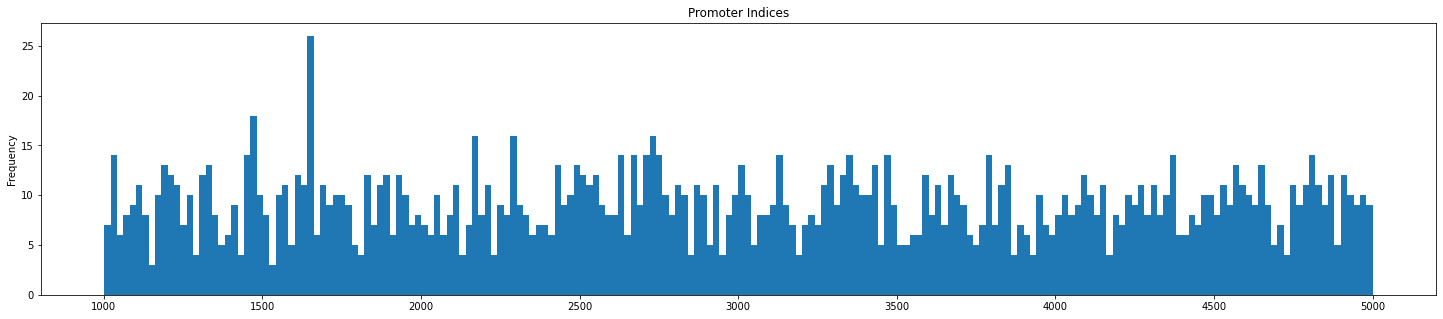

In [98]:
plt.figure()
subsequence_df['PromoterIndex'].plot.hist(histtype = 'bar', bins = 200, figsize = (25, 5), title = 'Promoter Indices')

## Density graph

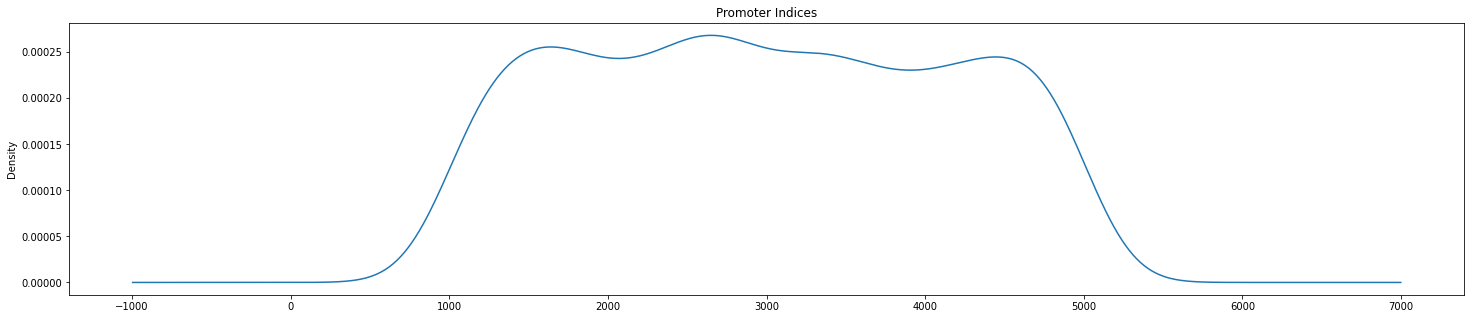

In [97]:
plt.figure()
subsequence_df['PromoterIndex'].plot.density(figsize = (25, 5), title = 'Promoter Indices')